# Assignment Part-I - House Prices

## Problem Statement 

`A US-based housing company named Surprise Housing has decided to enter the Australian market. 
The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.`

`The company wants to know`:
-  `Which variables are significant in predicting the price of a house, and` <br>
-  `How well those variables describe the price of a house.`


## Business Goal 

- `You are required to model the price of houses with the available independent variables.`<br>
- `This model will then be used by the management to understand how exactly the prices vary with the variables.` <br> 
- `They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.`<br>
- `Further, the model will be a good way for management to understand the pricing dynamics of a new market.`

In [144]:
# Importing the required library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics
import os

# importing warning package to ignore the warnings
import warnings
warnings.filterwarnings('ignore')

### Importing and Understanding Data

In [145]:
# Reading and inspecting the dataframe
data=pd.read_csv(r"C:\Users\kavlekar_m\Documents\Upgrade_ML_and_AI\Mod3-ML\Advance Regression\Assignement-housingPrice\train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [147]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [148]:
#inspecting the dataframe
# checking the number of rows and columns
data.shape

(1460, 81)

In [149]:
## Checking the percentage of Null values

data_missing=pd.DataFrame((round(100*(data.isnull().sum()/len(data.index)), 2)), columns=['missing'])

data_missing.sort_values(by = ['missing'], ascending=False).head(20)

,missing
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55
GarageFinish,5.55


In [150]:
## Treating the NaN Values based on the given data definition 

data['PoolQC'] = data['PoolQC'].fillna('No_Pool')
data['MiscFeature'] = data['MiscFeature'].fillna('None')
data['Alley'] = data['Alley'].fillna('No_Alley_Access')
data['Fence'] = data['Fence'].fillna('No_Fence')
data['FireplaceQu'] = data['FireplaceQu'].fillna('No_Fireplace')
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(0)
data['MasVnrType'] = data['MasVnrType'].fillna('None')
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)
data['Electrical'] = data['Electrical'].fillna("Other")

In [151]:
## Dropping the LotFontgage columns as it have more Null values
data.drop("LotFrontage",axis = 1, inplace=True)

In [152]:
# Replacing the Nan Values with 'No Basementh_data' based on the given data definition 
for col in ('BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond'):
    data[col] = data[col].fillna('No_Basement')

In [153]:
# Replacing the NaN values with 'no garage' based on the given data definition
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    data[col] = data[col].fillna('No_Garage')

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### Performing Exploratory Data Analysis:
#### Univariate and Bivariate Analysis

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

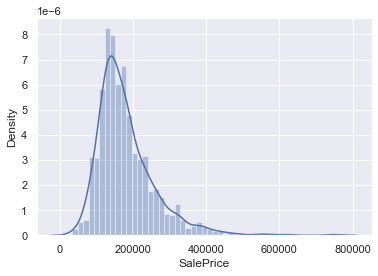

In [155]:
#checking for the distribution of the target variable, sales price

sns.distplot(data['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

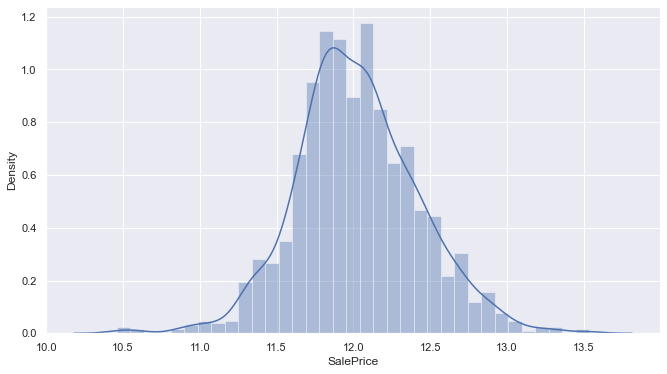

In [156]:
plt.figure(figsize=(11,6))
sns.distplot(np.log(data["SalePrice"]))

#### observation
- `There is a clear right-skew  in the distribution of sale price with a vast majority of property values in the $100,000 — $200,000 range, but with a long tail stretching upward towards $800,000.` <br>
- `taking the log of sale price transforms the distribution to approximately normal.`

#### Correlation Matrix:

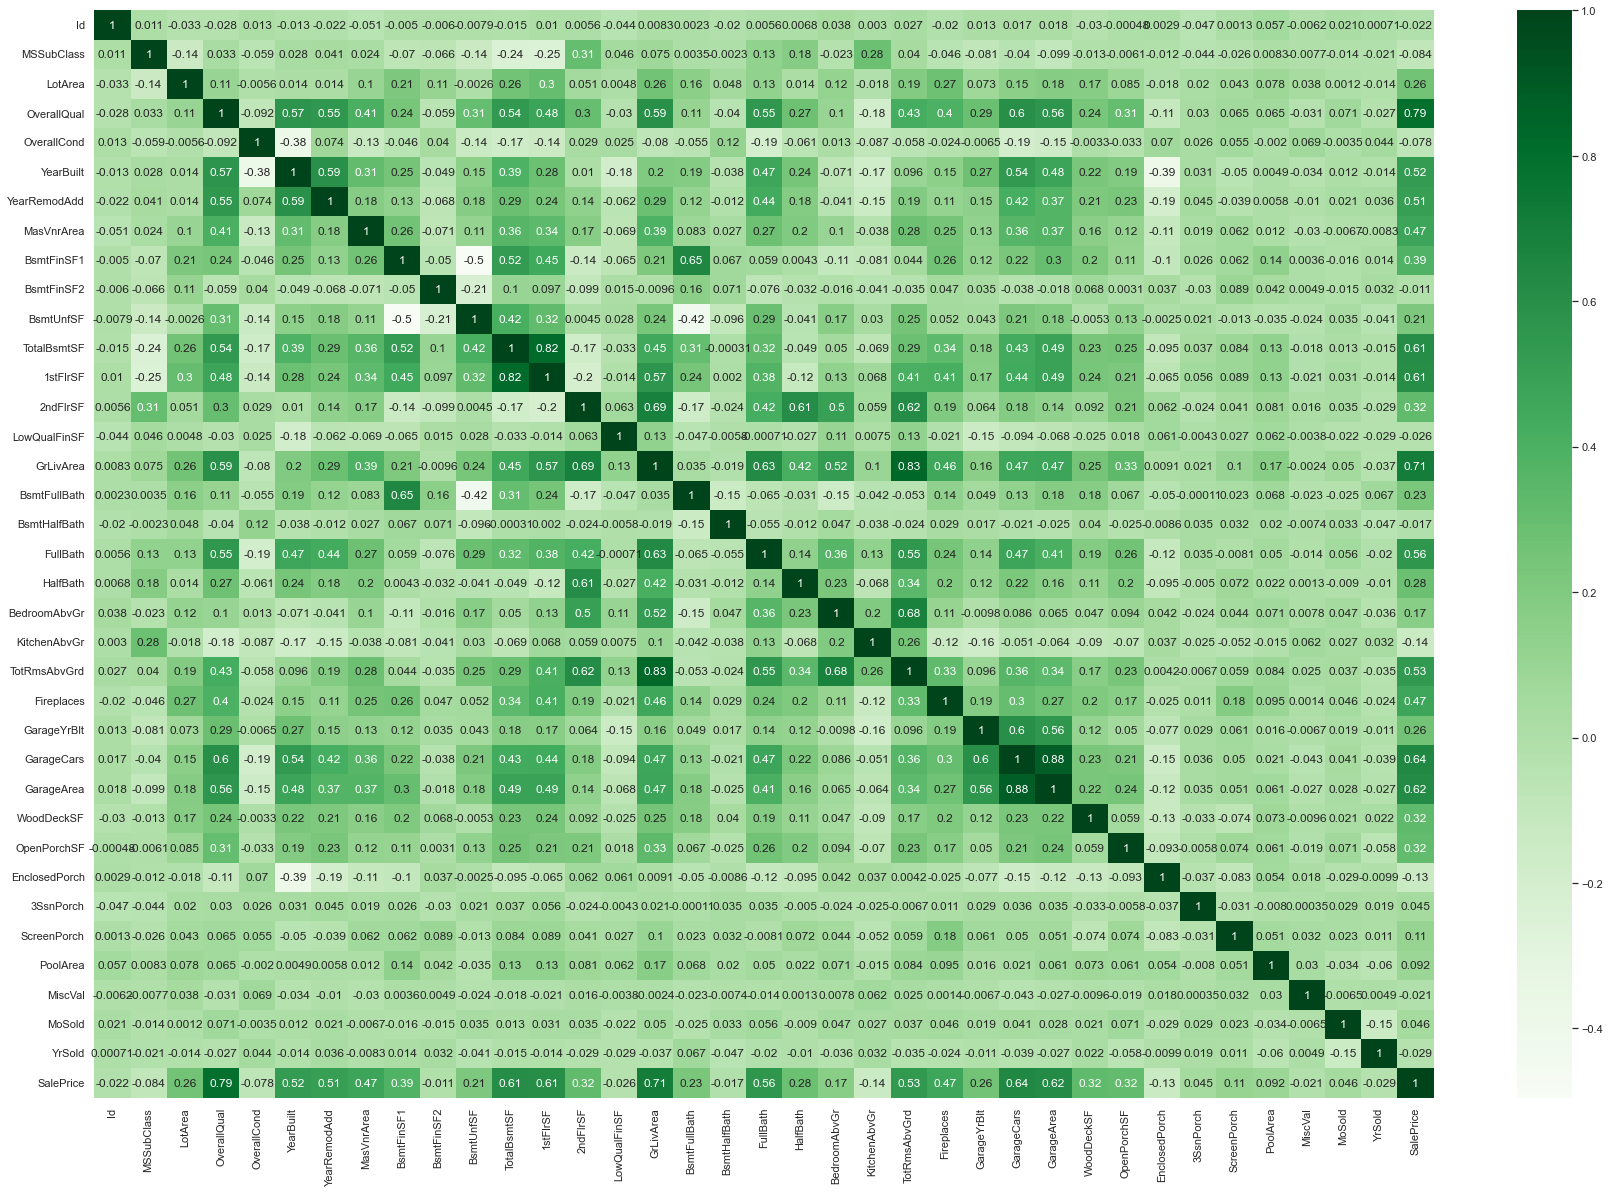

In [157]:
##  checking the correlation matrix

plt.figure(figsize = (30, 20))
sns.heatmap(data.corr(), annot = True, cmap="Greens")
plt.show()

#### Top 10 Correlated Variable — Correlation Matrix

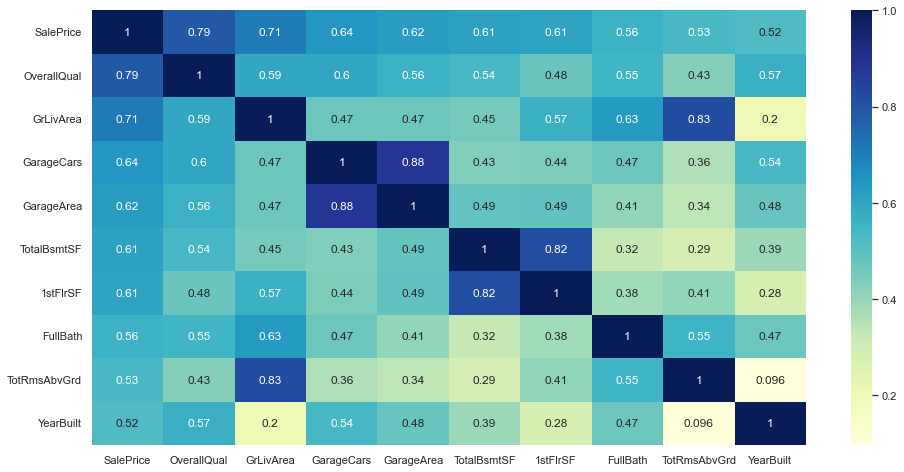

In [158]:
most_corr=data[['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']].corr()

plt.figure(figsize = (16, 8))
sns.heatmap(most_corr, cmap="YlGnBu", annot=True)
plt.show()

#### Scatterplot

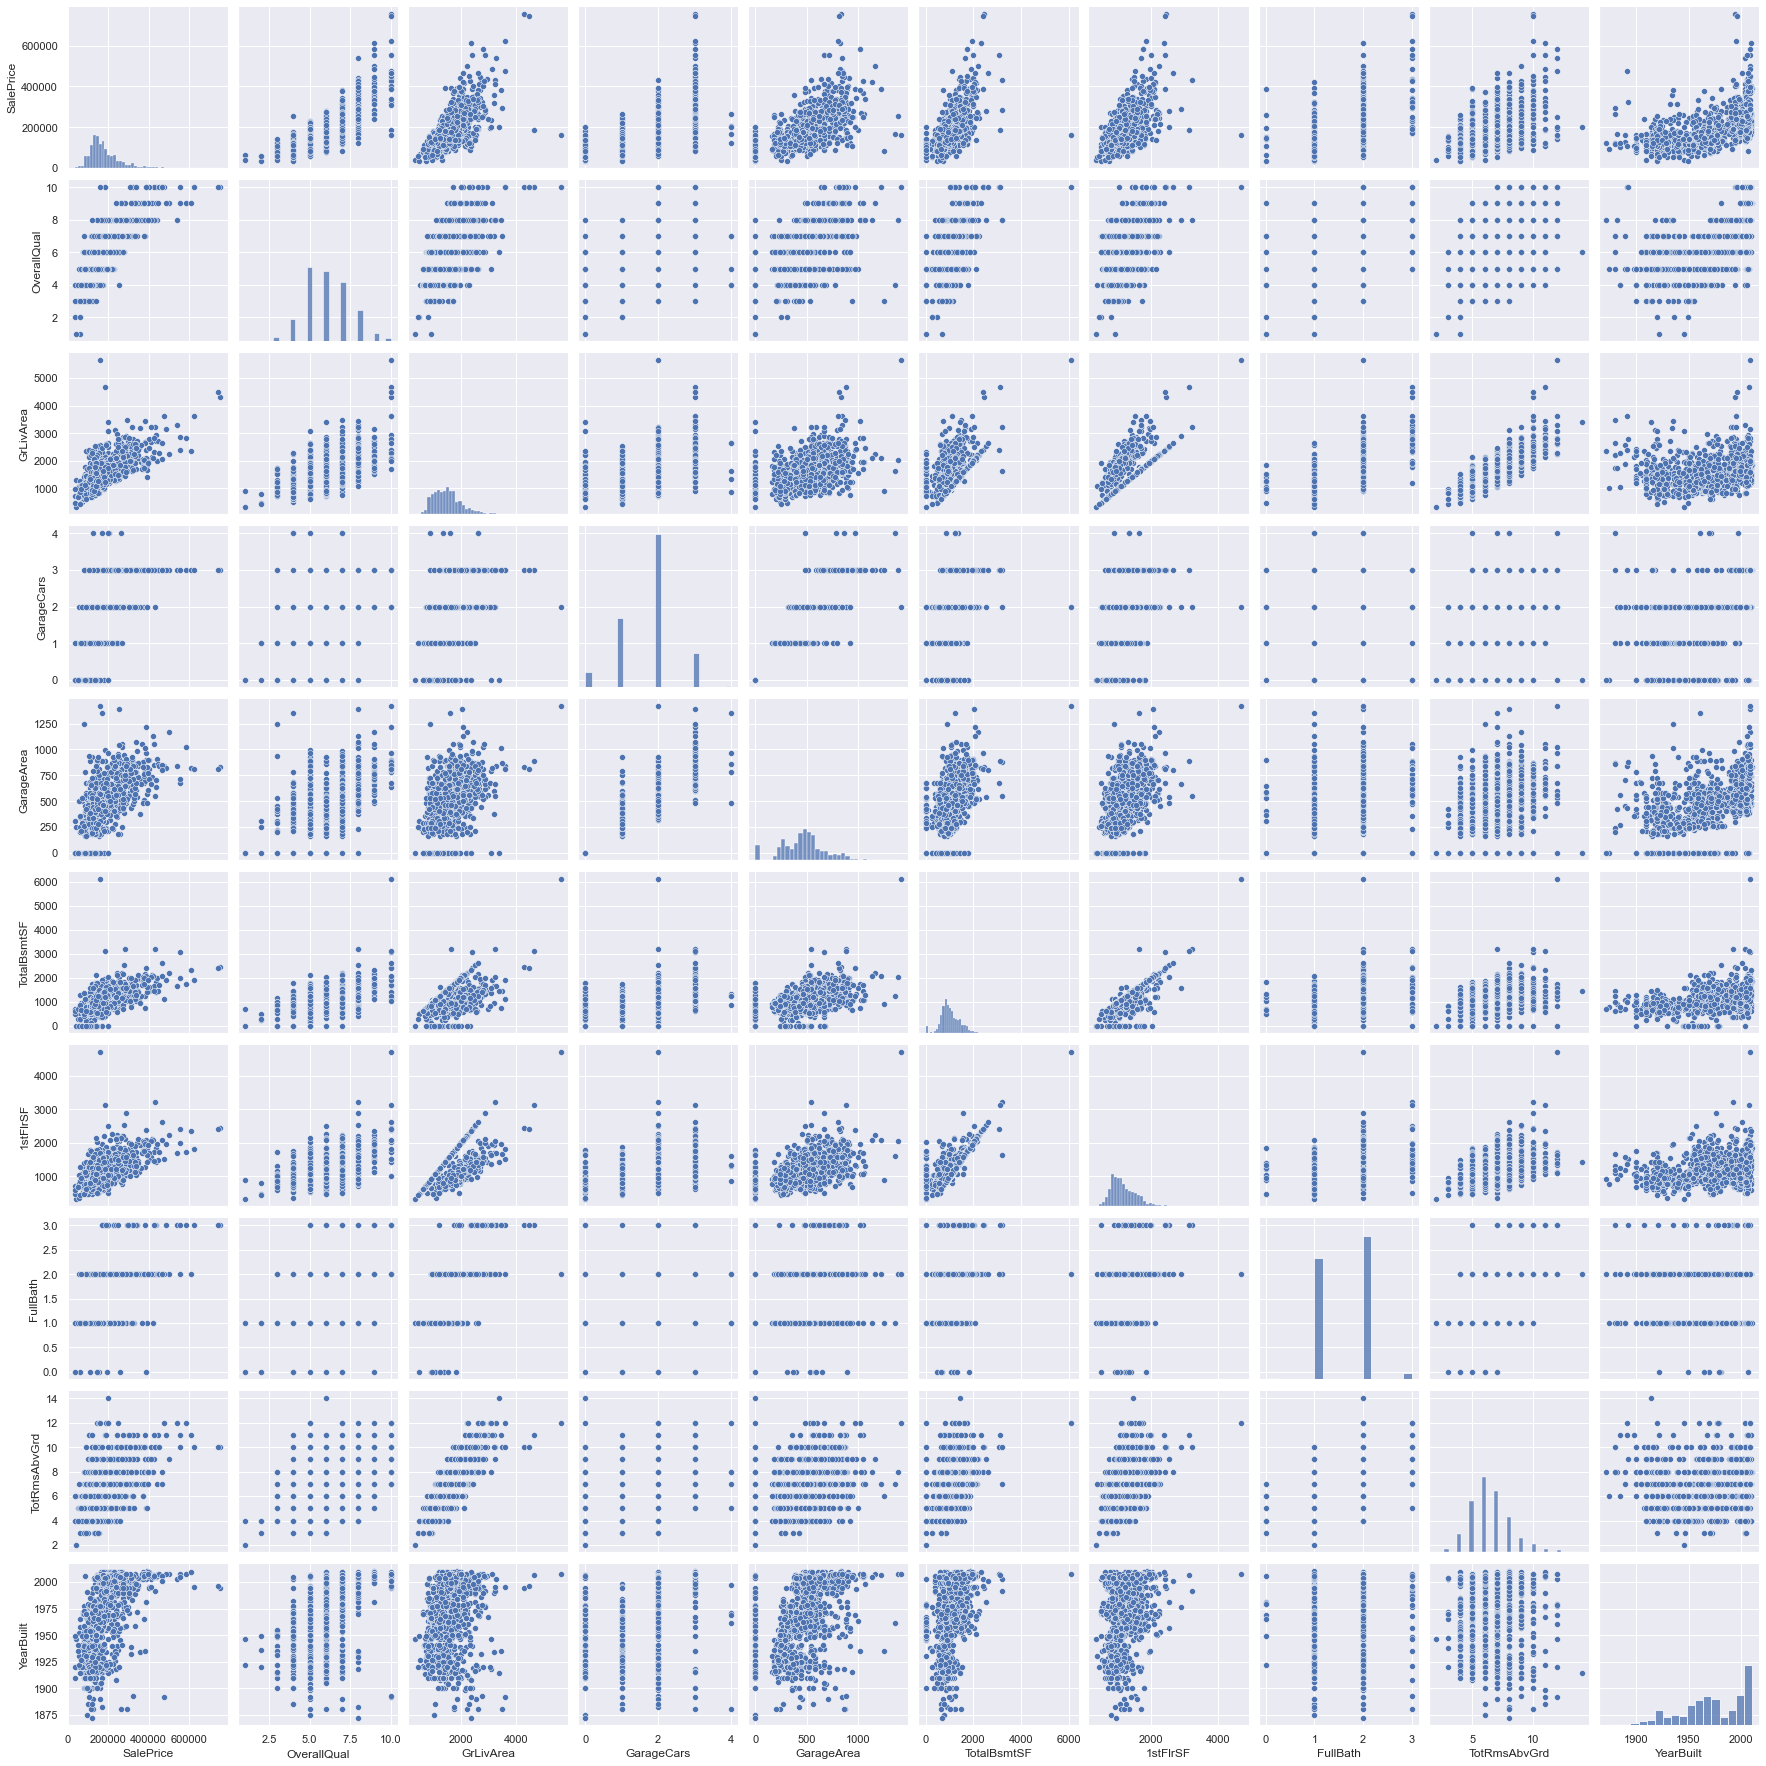

In [159]:
#scatterplot

sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea','TotalBsmtSF', '1stFlrSF','FullBath', 'TotRmsAbvGrd','YearBuilt']
sns.pairplot(data[cols], size = 2.5)
plt.show();

#### Overall Quality Vs Sale Price

Text(0.5, 1.0, 'Overall Quality vs SalePrice')

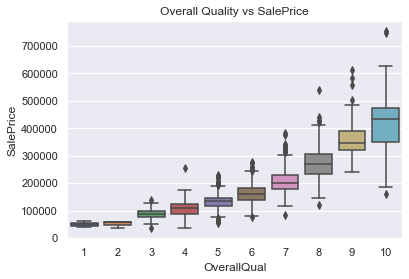

In [160]:
#Overall Quality Vs Sale Price
sns.boxplot(x='OverallQual', y='SalePrice', data=data)
plt.title("Overall Quality vs SalePrice")

#### Observation
`The plot defines we can state that as OverallQual increases, the SalePrice also increases.`

#### GrLivArea Vs SalePrice:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Gr LivArea vs SalePrice')

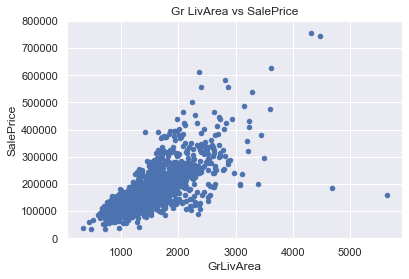

In [161]:
#GrLivArea Vs SalePrice:
x = pd.concat([data['SalePrice'], data['GrLivArea']], axis=1)
x.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));
plt.title('Gr LivArea vs SalePrice')

#### Observation:

`People pay more for more living area.`

In [162]:
#Function to remove outlier
def remove_outliers(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out


In [163]:
data = remove_outliers(data,'GrLivArea')

#### After removing the oulier 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Gr LivArea vs SalePrice')

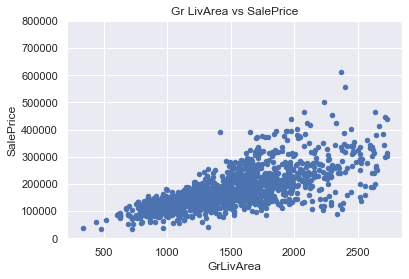

In [164]:
#GrLivArea Vs SalePrice after removing outlier:
x = pd.concat([data['SalePrice'], data['GrLivArea']], axis=1)
x.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));
plt.title('Gr LivArea vs SalePrice')

#### GarageCars Vs SalePrice

Text(0.5, 1.0, 'GarageCars vs SalePrice')

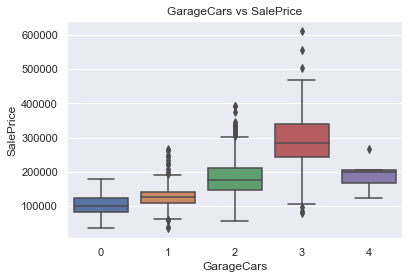

In [165]:
#GarageCars Vs SalePrice
sns.boxplot(x='GarageCars', y='SalePrice', data=data)
plt.title("GarageCars vs SalePrice")

#### observation
`From the above plot we can say that for GarageCars of 3, the SalePrice is more.`

#### GarageArea Vs SalePrice

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'GarageArea vs SalePrice')

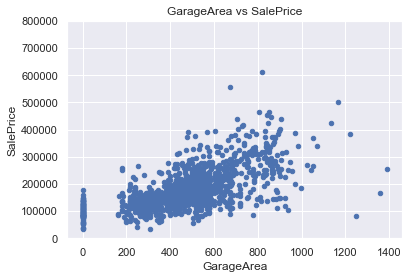

In [166]:
#GarageArea Vs SalePrice
x = pd.concat([data['SalePrice'], data['GarageArea']], axis=1)
x.plot.scatter(x='GarageArea', y='SalePrice', ylim=(0,800000));
plt.title('GarageArea vs SalePrice')

In [167]:
# test_data = data
# test_data = remove_outliers(data,'GarageArea')
# x = pd.concat([test_data['SalePrice'], data['GarageArea']], axis=1)
# x.plot.scatter(x='GarageArea', y='SalePrice', ylim=(0,800000));
# plt.title('GarageArea vs SalePrice')

#### Observation
From the above plot, we can say that for GarageArea of 200–1000 has most of the SalePrice.

#### TotalBsmtSF vs SalePrice

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'TotalBsmtSF vs SalePrice')

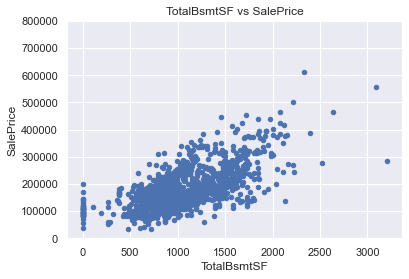

In [168]:
#TotalBsmtSF vs SalePrice
x = pd.concat([data['SalePrice'], data['TotalBsmtSF']], axis=1)
x.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000));
plt.title('TotalBsmtSF vs SalePrice')

#### Observation
`From the above plot, we can say that as Total square feet of basement area increass SalePrice also increases.`

#### 1stFlrSF vs SalePrice

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, '1stFlrSF vs SalePrice')

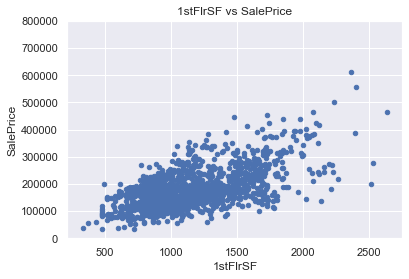

In [169]:
#1stFlrSF vs SalePrice
x = pd.concat([data['SalePrice'], data['1stFlrSF']], axis=1)
x.plot.scatter(x='1stFlrSF', y='SalePrice', ylim=(0,800000));
plt.title('1stFlrSF vs SalePrice')

#### Observation
`From the above plot, we can say that for 1stFirSF of 500–2000 has most of the SalePrice.` <br>
`We can see as 1st-floor square feet increases, the SalePrice also increases.`

#### TotRmsAbvGrd vs SalePrice

Text(0.5, 1.0, 'TotRmsAbvGrd vs SalePrice')

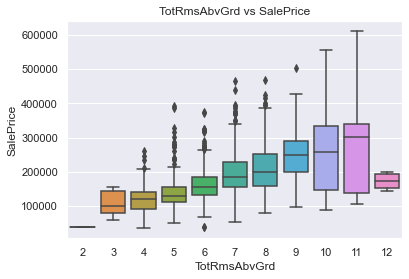

In [170]:
#TotRmsAbvGrd vs SalePrice
sns.boxplot(x='TotRmsAbvGrd', y='SalePrice', data=data)
plt.title("TotRmsAbvGrd vs SalePrice")

#### Observation
`From the above plot, we can say that for TotRmsAbvGrd having more than 11 rows has less weight.`

#### YearBuilt vs SalePrice

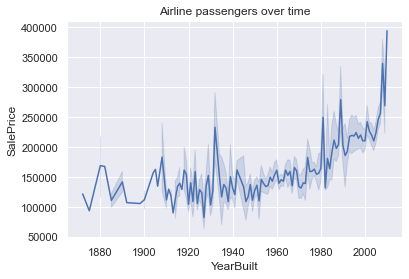

In [171]:
#YearBuilt vs SalePrice
sns.lineplot(data=data, 
             x='YearBuilt', 
             y='SalePrice').set_title('Airline passengers over time');

#### Observation:
`We can see, as the building ages the cost is both increasing and decreasing.`

### Deriving Variables

In [172]:
numeric_data = data.select_dtypes(include = ['float64','int64'])
numeric_data.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [173]:
#Converting a Binary varible into numeric datatypes
# mapping it to 0 and 1
data['Street'] = data['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )

data['CentralAir'] = data['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)
                                                  
data['PavedDrive'] = data['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)

In [174]:
#categorical values
cat_values = data.select_dtypes(include=['object'])
cat_values.head()

,MSZoning,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,No_Alley_Access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,No_Fireplace,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
1,RL,No_Alley_Access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
2,RL,No_Alley_Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
3,RL,No_Alley_Access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Detchd,Unf,TA,TA,No_Pool,No_Fence,None,WD,Abnorml
4,RL,No_Alley_Access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal


In [175]:
# convert into dummies
data_dummies = pd.get_dummies(cat_values, drop_first=True)
data_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No_Alley_Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [176]:
## Droping the 'Id' column 
df = data.drop(['Id'],axis=1)

# Droping the original categorical column
df = df.drop(list(cat_values.columns), axis=1)

# Adding the dummy categorical column to original dataset
df = pd.concat([df,data_dummies], axis=1)

In [177]:
df.shape

(1429, 255)

### Train Test Split

In [178]:
df_train,df_test = train_test_split(df, train_size=0.7,test_size = 0.3, random_state=100)

In [179]:
y_train = np.log(df_train.SalePrice)
X_train = df_train.drop("SalePrice",1)

y_test= np.log(df_test.SalePrice)
X_test = df_test.drop("SalePrice",1)

In [180]:
num_values=X_train.select_dtypes(include=['int64','float64']).columns
num_values

Index(['MSSubClass', 'LotArea', 'Street', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [181]:
scaler = StandardScaler()
X_train[num_values] = scaler.fit_transform(X_train[num_values])
X_test[num_values] = scaler.transform(X_test[num_values])

### Model Building

In [182]:
## Building a Regression model.
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [183]:
# Calculating the RFE
rfe = RFE(reg, 20)
rfe = rfe.fit(X_train, y_train)

In [184]:
#lets check the ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 117),
 ('LotArea', False, 94),
 ('Street', False, 196),
 ('OverallQual', True, 1),
 ('OverallCond', False, 64),
 ('YearBuilt', False, 46),
 ('YearRemodAdd', False, 130),
 ('MasVnrArea', False, 208),
 ('BsmtFinSF1', False, 7),
 ('BsmtFinSF2', False, 21),
 ('BsmtUnfSF', False, 25),
 ('TotalBsmtSF', False, 9),
 ('CentralAir', False, 133),
 ('1stFlrSF', False, 16),
 ('2ndFlrSF', False, 15),
 ('LowQualFinSF', False, 22),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 160),
 ('BsmtHalfBath', False, 217),
 ('FullBath', False, 187),
 ('HalfBath', False, 190),
 ('BedroomAbvGr', False, 231),
 ('KitchenAbvGr', False, 152),
 ('TotRmsAbvGrd', False, 201),
 ('Fireplaces', False, 197),
 ('GarageYrBlt', False, 174),
 ('GarageCars', False, 79),
 ('GarageArea', False, 158),
 ('PavedDrive', False, 235),
 ('WoodDeckSF', False, 167),
 ('OpenPorchSF', False, 212),
 ('EnclosedPorch', False, 182),
 ('3SsnPorch', False, 175),
 ('ScreenPorch', False, 168),
 ('PoolArea', False, 163),
 (

In [185]:
col=X_train.columns[rfe.support_]
col

Index(['OverallQual', 'GrLivArea', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'HouseStyle_2.5Fin', 'RoofMatl_Membran',
       'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Foundation_Wood',
       'BsmtCond_Po', 'Heating_GasA', 'Electrical_Mix', 'Electrical_Other',
       'Functional_Mod', 'Functional_Sev', 'GarageQual_Fa',
       'GarageQual_No_Garage', 'PoolQC_Gd'],
      dtype='object')

In [186]:
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [187]:
X_train_new=X_train[col]
X_train_new = sm.add_constant(X_train_new)

#create first model
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

#Print the summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     229.3
Date:                Tue, 07 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:09:40   Log-Likelihood:                 390.36
No. Observations:                1000   AIC:                            -740.7
Df Residuals:                     980   BIC:                            -642.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.5150      0.073    157.384      0.000      11.371      11.659
OverallQual              0.2019      0.007     29.337      0.000       0.188       0.215
GrLivArea                0.1308      0.007     19.953      0.000       0.118       0.144
MSZoning_FV              0.3847      0.070      5.524      0.000       0.248       0.521
MSZoning_RH              0.3066      0.084      3.666      0.000       0.142       0.471
MSZoning_RL              0.4118      0.064      6.452      0.000       0.287       0.537
MSZoning_RM              0.2256      0.065      3.489      0.001       0.099       0.352
HouseStyle_2.5Fin       -0.2210      0.084     -2.618      0.009      -0.387      -0.055
RoofMatl_Membran         0.4138      0.174      2.383      0.017       0.073       0.754
Exterior1st_BrkComm     -0.3265      0.121     -2.693      0.007      -0.564      -0.089
Exterior1st_CBlock      -0.1634      0.166     -0.985      0.325      -0.489       0.162
Foundation_Wood         -0.2163      0.117     -1.847      0.065      -0.446       0.014
BsmtCond_Po             -0.2446      0.083     -2.945      0.003      -0.407      -0.082
Heating_GasA             0.1321      0.035      3.753      0.000       0.063       0.201
Electrical_Mix          -0.2446      0.083     -2.945      0.003      -0.407      -0.082
Electrical_Other         0.1472      0.166      0.889      0.374      -0.178       0.472
Functional_Mod          -0.1925      0.052     -3.713      0.000      -0.294      -0.091
Functional_Sev          -0.5558      0.166     -3.346      0.001      -0.882      -0.230
GarageQual_Fa           -0.1307      0.031     -4.245      0.000      -0.191      -0.070
GarageQual_No_Garage    -0.1861      0.024     -7.716      0.000      -0.233      -0.139
PoolQC_Gd                0.1764      0.117      1.506      0.132      -0.054       0.406
==============================================================================
Omnibus:                       47.832   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.470
Skew:                          -0.227   Prob(JB):                     1.14e-26
Kurtosis:                       4.631   Cond. No.                     5.16e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.95e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Ridge Regression

In [188]:
# list of alphas to tune


params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [189]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 10.0}
-0.08107603017143009


In [190]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007978,6.325610e-04,0.002792,7.465058e-04,0.0001,{'alpha': 0.0001},-0.081906,-0.097056,-0.102490,-0.082465,...,-0.091570,0.008139,26,-0.060490,-0.057009,-0.057808,-0.059570,-0.057162,-0.058408,0.001382
1,0.007980,7.599534e-07,0.003390,4.881497e-04,0.001,{'alpha': 0.001},-0.081862,-0.097029,-0.102433,-0.082370,...,-0.091495,0.008143,25,-0.060503,-0.057013,-0.057811,-0.059575,-0.057166,-0.058413,0.001385
2,0.007381,1.017009e-03,0.002992,6.308272e-04,0.01,{'alpha': 0.01},-0.081488,-0.096658,-0.101937,-0.081585,...,-0.090894,0.008172,24,-0.060607,-0.057048,-0.057841,-0.059619,-0.057244,-0.058472,0.001400
3,0.007580,7.979277e-04,0.002792,3.989698e-04,0.05,{'alpha': 0.05},-0.080363,-0.095149,-0.100432,-0.079780,...,-0.089351,0.008144,23,-0.060915,-0.057177,-0.057955,-0.059807,-0.057489,-0.058669,0.001447
4,0.006981,6.303742e-04,0.002992,6.312788e-04,0.1,{'alpha': 0.1},-0.079475,-0.093888,-0.098986,-0.078791,...,-0.088200,0.007951,22,-0.061186,-0.057321,-0.058097,-0.060015,-0.057667,-0.058857,0.001491
5,0.007780,3.988744e-04,0.002991,3.234067e-07,0.2,{'alpha': 0.2},-0.078580,-0.092409,-0.096925,-0.077852,...,-0.086850,0.007542,21,-0.061555,-0.057675,-0.058368,-0.060405,-0.057950,-0.059190,0.001522
6,0.007780,7.464039e-04,0.003191,3.992800e-04,0.3,{'alpha': 0.3},-0.078165,-0.091582,-0.095532,-0.077336,...,-0.086086,0.007235,20,-0.061847,-0.058015,-0.058685,-0.060790,-0.058187,-0.059505,0.001534
7,0.006383,4.885584e-04,0.003191,3.992798e-04,0.4,{'alpha': 0.4},-0.077931,-0.090988,-0.094541,-0.076956,...,-0.085567,0.007012,19,-0.062091,-0.058303,-0.058958,-0.061142,-0.058402,-0.059779,0.001546
8,0.007578,7.974886e-04,0.002593,4.884419e-04,0.5,{'alpha': 0.5},-0.077781,-0.090530,-0.093785,-0.076642,...,-0.085175,0.006843,18,-0.062337,-0.058565,-0.059208,-0.061456,-0.058597,-0.060033,0.001564
9,0.006782,7.460854e-04,0.003191,3.986842e-04,0.6,{'alpha': 0.6},-0.077665,-0.090145,-0.093130,-0.076405,...,-0.084849,0.006689,17,-0.062563,-0.058820,-0.059430,-0.061732,-0.058764,-0.060262,0.001579


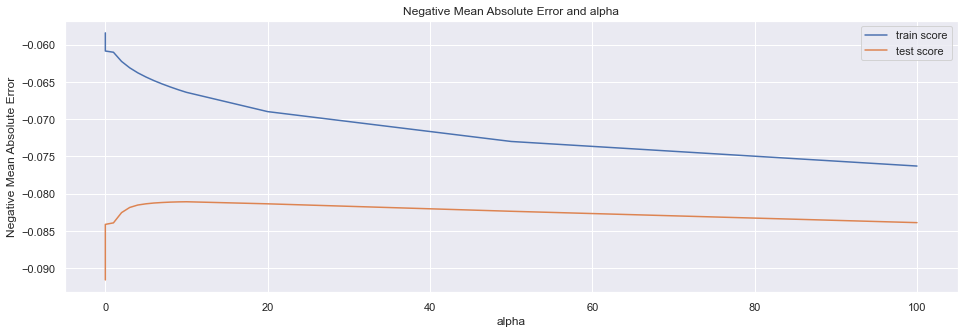

In [191]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [192]:
#final ridge model
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.05665030e-02,  2.44094511e-02,  1.10063317e-02,  6.99070555e-02,
        4.66614211e-02,  4.85590854e-02,  1.78327502e-02,  3.27466355e-03,
        3.02735955e-02,  1.04636814e-02,  1.56889595e-03,  3.65897442e-02,
        1.60013732e-02,  3.77562735e-02,  3.85147638e-02,  3.50777187e-04,
        6.58452985e-02,  1.39239939e-02,  3.50267581e-03,  1.19392223e-02,
        7.71422366e-03, -4.57732146e-03, -1.41205822e-02,  1.06568351e-02,
        7.30036312e-03,  4.75200004e-03,  3.08319616e-02,  8.24516962e-03,
        1.72749318e-03,  1.32723345e-02,  1.55093432e-03,  8.63717158e-03,
        6.42564652e-03,  1.31747631e-02,  1.06266684e-02, -1.36989706e-03,
       -2.58296491e-03, -2.36994735e-03,  5.11048362e-02,  1.91171215e-02,
        5.01454767e-02, -7.69563524e-03,  6.79321846e-04,  1.04233515e-02,
        1.16067805e-02,  3.55427545e-05,  5.90853701e-03,  1.34284465e-02,
       -2.87880281e-02,  4.17929660e-03,  0.00000000e+00,  2.26790400e-02,
       -2.21968510e-02, -

In [193]:
#lets predict the R-squared value 
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9362156697587181


In [194]:
# Prediction on test set
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9145176894724916


In [195]:
# Printing the RMSE value
mean_squared_error(y_test, y_test_pred)

0.012896808639337797

In [196]:
# Printing the RMSE value
mean_squared_error(y_train, y_train_pred)

0.00931636048480285

## Lasso Regression

In [197]:
#lasso
params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [198]:
cv_results_l = pd.DataFrame(lasso_cv.cv_results_)

print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.001}
-0.08174270794291083


In [199]:
#final lasso model
alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [200]:
#Predict the R-squared value for Train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9248878172336619


In [201]:
#Predict the R-squared value for test data

y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9141712217150626


In [202]:
mean_squared_error(y_test, y_test_pred)

0.012949080604609772

In [203]:
mean_squared_error(y_train, y_train_pred)

0.010970910391384838

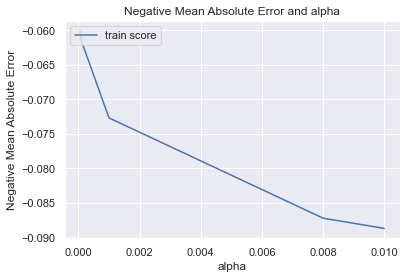

In [204]:
#lasso.coef_
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [205]:
model_cv.best_params_

{'alpha': 10.0}

In [211]:
ridge = Ridge(alpha = 10)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9362156697587181
0.9145176894724916


In [212]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [213]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
0,MSSubClass,11.795156
63,Neighborhood_Crawfor,0.102989
253,SaleCondition_Normal,0.083665
4,OverallCond,0.069907
17,BsmtFullBath,0.065845
247,SaleType_New,0.061713
79,Neighborhood_StoneBr,0.061382
39,MSZoning_FV,0.051105
41,MSZoning_RL,0.050145
120,Exterior1st_BrkFace,0.049724


In [214]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9248878172336619
0.9141712217150626


### Conclusion :

`Best alpha value for Lasso : {'alpha': 0.001}` <BR>
`Best alpha value for Ridge : {'alpha': 10}`


`After compairing both the model we can see that the below Features are best explaining the DataSet` <br>

- `MSSubClass`  <BR>
- `Neighborhood_Crawfor`  <BR>
- `SaleCondition_Normal`  <BR>
- `OverallCond	`  <BR>
- `BsmtFullBath`  <BR>
- `SaleType_New`  <BR>
- `Neighborhood_StoneBr`  <BR>
- `MSZoning_FV`  <BR>
- `MSZoning_RL`  <BR>
- `Exterior1st_BrkFace`  <BR>